In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [2]:
# let's explore premier league events dataset

epl_events_df = pd.read_csv("/kaggle/input/european-football-season-202223/events_premier-league_2022-23.csv")

epl_events_df.shape

(3906, 8)

In [3]:
epl_matches_df = pd.read_csv("/kaggle/input/european-football-season-202223/matches_premier-league_2022-23.csv", index_col=0)

epl_matches_df.shape

(270, 28)

In [4]:
events_matches_df = epl_events_df.merge(epl_matches_df, on="match_id", how="left", suffixes=("_evt", "_mth"))
events_matches_df.head()

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2,stage,date,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,1,Arsenal,home,28,Goal,Gabriel Martinelli,Bukayo Saka,Matchday 28,19/03/2023,...,0.02,0.07,75752,Emirates Stadium,"[{'player_name': ' Martinelli ', 'player_numbe...","[{'player_name': ' Édouard ', 'player_number':...","['Martinelli', 'Trossard', 'Saka', 'Xhaka', 'P...","['11', '19', '7', '34', '5', '8', '35', '6', '...","['Édouard', 'Zaha', 'Schlupp', 'Olise', 'Douco...","['22', '11', '15', '7', '28', '4', '3', '6', '..."
1,2,1,Arsenal,home,43,Goal,Bukayo Saka,Ben White,Matchday 28,19/03/2023,...,0.02,0.07,75752,Emirates Stadium,"[{'player_name': ' Martinelli ', 'player_numbe...","[{'player_name': ' Édouard ', 'player_number':...","['Martinelli', 'Trossard', 'Saka', 'Xhaka', 'P...","['11', '19', '7', '34', '5', '8', '35', '6', '...","['Édouard', 'Zaha', 'Schlupp', 'Olise', 'Douco...","['22', '11', '15', '7', '28', '4', '3', '6', '..."
2,3,1,Arsenal,home,55,Goal,Granit Xhaka,Leandro Trossard,Matchday 28,19/03/2023,...,0.02,0.07,75752,Emirates Stadium,"[{'player_name': ' Martinelli ', 'player_numbe...","[{'player_name': ' Édouard ', 'player_number':...","['Martinelli', 'Trossard', 'Saka', 'Xhaka', 'P...","['11', '19', '7', '34', '5', '8', '35', '6', '...","['Édouard', 'Zaha', 'Schlupp', 'Olise', 'Douco...","['22', '11', '15', '7', '28', '4', '3', '6', '..."
3,4,1,Crystal Palace,away,59,Yellow card,James Tomkins,NaN,Matchday 28,19/03/2023,...,0.02,0.07,75752,Emirates Stadium,"[{'player_name': ' Martinelli ', 'player_numbe...","[{'player_name': ' Édouard ', 'player_number':...","['Martinelli', 'Trossard', 'Saka', 'Xhaka', 'P...","['11', '19', '7', '34', '5', '8', '35', '6', '...","['Édouard', 'Zaha', 'Schlupp', 'Olise', 'Douco...","['22', '11', '15', '7', '28', '4', '3', '6', '..."
4,5,1,Crystal Palace,away,63,Goal,Jeffrey Schlupp,NaN,Matchday 28,19/03/2023,...,0.02,0.07,75752,Emirates Stadium,"[{'player_name': ' Martinelli ', 'player_numbe...","[{'player_name': ' Édouard ', 'player_number':...","['Martinelli', 'Trossard', 'Saka', 'Xhaka', 'P...","['11', '19', '7', '34', '5', '8', '35', '6', '...","['Édouard', 'Zaha', 'Schlupp', 'Olise', 'Douco...","['22', '11', '15', '7', '28', '4', '3', '6', '..."


In [5]:
# Let's clean our data

events_matches_df.describe(include='all')

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2,stage,date,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
count,3906.000000,3906.000000,3906,3906,3906.000000,3906,3906,2685,3906,3906,...,3906.000000,3906.000000,3.906000e+03,3906,3906,3906,3906,3906,3906,3906
unique,NaN,NaN,20,2,NaN,10,509,422,28,82,...,NaN,NaN,NaN,20,257,252,257,257,252,252
top,NaN,NaN,Tottenham,home,NaN,Substitution,Disallowed goal,Penalty,Matchday 9,18/02/2023,...,NaN,NaN,NaN,Tottenham Hotspur Stadium,"[{'player_name': ' Martinelli ', 'player_numbe...","[{'player_name': ' Martinelli ', 'player_numbe...","['Martinelli', 'Nketiah', 'Saka', 'Xhaka', 'Pa...","['11', '14', '7', '34', '5', '8', '35', '6', '...","['Martinelli', 'Jesus', 'Saka', 'Xhaka', 'Part...","['11', '9', '7', '34', '5', '8', '35', '6', '1..."
freq,NaN,NaN,217,1983,NaN,2098,36,50,159,121,...,NaN,NaN,NaN,222,35,56,35,35,56,56
mean,1953.500000,135.279826,NaN,NaN,64.090374,NaN,NaN,NaN,NaN,NaN,...,0.053935,0.449283,7.856348e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1127.709404,78.365138,NaN,NaN,22.373967,NaN,NaN,NaN,NaN,NaN,...,0.024108,0.271990,1.187999e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.010000,0.040000,1.314800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,977.250000,67.000000,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,...,0.030000,0.190000,2.477300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1953.500000,135.000000,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,...,0.050000,0.430000,5.213500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2929.750000,204.000000,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,NaN,...,0.070000,0.700000,1.053100e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
events_matches_df.duplicated().any()

False

In [7]:
# Let's clean the matches dataset

events_matches_df.describe(include="all")

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2,stage,date,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
count,3906.000000,3906.000000,3906,3906,3906.000000,3906,3906,2685,3906,3906,...,3906.000000,3906.000000,3.906000e+03,3906,3906,3906,3906,3906,3906,3906
unique,NaN,NaN,20,2,NaN,10,509,422,28,82,...,NaN,NaN,NaN,20,257,252,257,257,252,252
top,NaN,NaN,Tottenham,home,NaN,Substitution,Disallowed goal,Penalty,Matchday 9,18/02/2023,...,NaN,NaN,NaN,Tottenham Hotspur Stadium,"[{'player_name': ' Martinelli ', 'player_numbe...","[{'player_name': ' Martinelli ', 'player_numbe...","['Martinelli', 'Nketiah', 'Saka', 'Xhaka', 'Pa...","['11', '14', '7', '34', '5', '8', '35', '6', '...","['Martinelli', 'Jesus', 'Saka', 'Xhaka', 'Part...","['11', '9', '7', '34', '5', '8', '35', '6', '1..."
freq,NaN,NaN,217,1983,NaN,2098,36,50,159,121,...,NaN,NaN,NaN,222,35,56,35,35,56,56
mean,1953.500000,135.279826,NaN,NaN,64.090374,NaN,NaN,NaN,NaN,NaN,...,0.053935,0.449283,7.856348e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1127.709404,78.365138,NaN,NaN,22.373967,NaN,NaN,NaN,NaN,NaN,...,0.024108,0.271990,1.187999e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.010000,0.040000,1.314800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,977.250000,67.000000,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,...,0.030000,0.190000,2.477300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1953.500000,135.000000,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,...,0.050000,0.430000,5.213500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2929.750000,204.000000,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,NaN,...,0.070000,0.700000,1.053100e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Thankfully, it seems that our data is cleaned already. We can go ahead to start the analysis of our data. Let's start with some overall premier league stats.

In [8]:
# The Events Summary for all premier league matches

events_matches_df["event_type"].value_counts()

Substitution          2098
Yellow card            993
Goal                   653
Penalty                 50
Disallowed goal         36
Own goal                33
Red card                15
Missed penalty          15
Second yellow card      10
Retracted red card       3
Name: event_type, dtype: int64

In [9]:
events_matches_df.columns

Index(['event_id', 'match_id', 'team', 'event_team', 'event_time',
       'event_type', 'action_player_1', 'action_player_2', 'stage', 'date',
       'pens', 'pens_home_score', 'pens_away_score', 'team_name_home',
       'team_name_away', 'team_home_score', 'team_away_score',
       'possession_home', 'possession_away', 'total_shots_home',
       'total_shots_away', 'shots_on_target_home', 'shots_on_target_away',
       'duels_won_home', 'duels_won_away', 'prediction_team_home_win',
       'prediction_draw', 'prediction_team_away_win', 'prediction_quantity',
       'location', 'lineup_home', 'lineup_away', 'player_names_home',
       'player_numbers_home', 'player_names_away', 'player_numbers_away'],
      dtype='object')

In [10]:
# Let's get some columns that we need for some analysis

epl_matches_select = events_matches_df[['match_id', 'team', 'event_team','stage', 'date', 'team_name_home', 'team_name_away',
       'team_home_score', 'team_away_score', 'possession_home',
       'possession_away', 'total_shots_home', 'total_shots_away',
       'shots_on_target_home', 'shots_on_target_away', 'duels_won_home',
       'duels_won_away', 'prediction_team_home_win', 'prediction_draw',
       'prediction_team_away_win']]

epl_matches_select.drop_duplicates().head()

,match_id,team,event_team,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win
0,1,Arsenal,home,Matchday 28,19/03/2023,Arsenal,Crystal Palace,4,1,0.63,0.37,15,9,5,5,0.55,0.45,0.91,0.02,0.07
3,1,Crystal Palace,away,Matchday 28,19/03/2023,Arsenal,Crystal Palace,4,1,0.63,0.37,15,9,5,5,0.55,0.45,0.91,0.02,0.07
15,2,Everton,away,Matchday 28,18/03/2023,Chelsea,Everton,2,2,0.69,0.31,20,12,7,3,0.57,0.43,0.86,0.03,0.11
17,2,Chelsea,home,Matchday 28,18/03/2023,Chelsea,Everton,2,2,0.69,0.31,20,12,7,3,0.57,0.43,0.86,0.03,0.11
29,3,Leeds,away,Matchday 28,18/03/2023,Wolves,Leeds,2,4,0.66,0.34,23,11,8,4,0.51,0.49,0.53,0.07,0.40


In [11]:
team_stats_unique = epl_matches_select.drop_duplicates()
team_stats = team_stats_unique.groupby(["team","event_team"])[["team_home_score", "team_away_score"]].agg([np.sum])
team_stats.columns = ["Home Team Goals", "Away Team Goals"]
team_stats.reset_index(inplace=True)

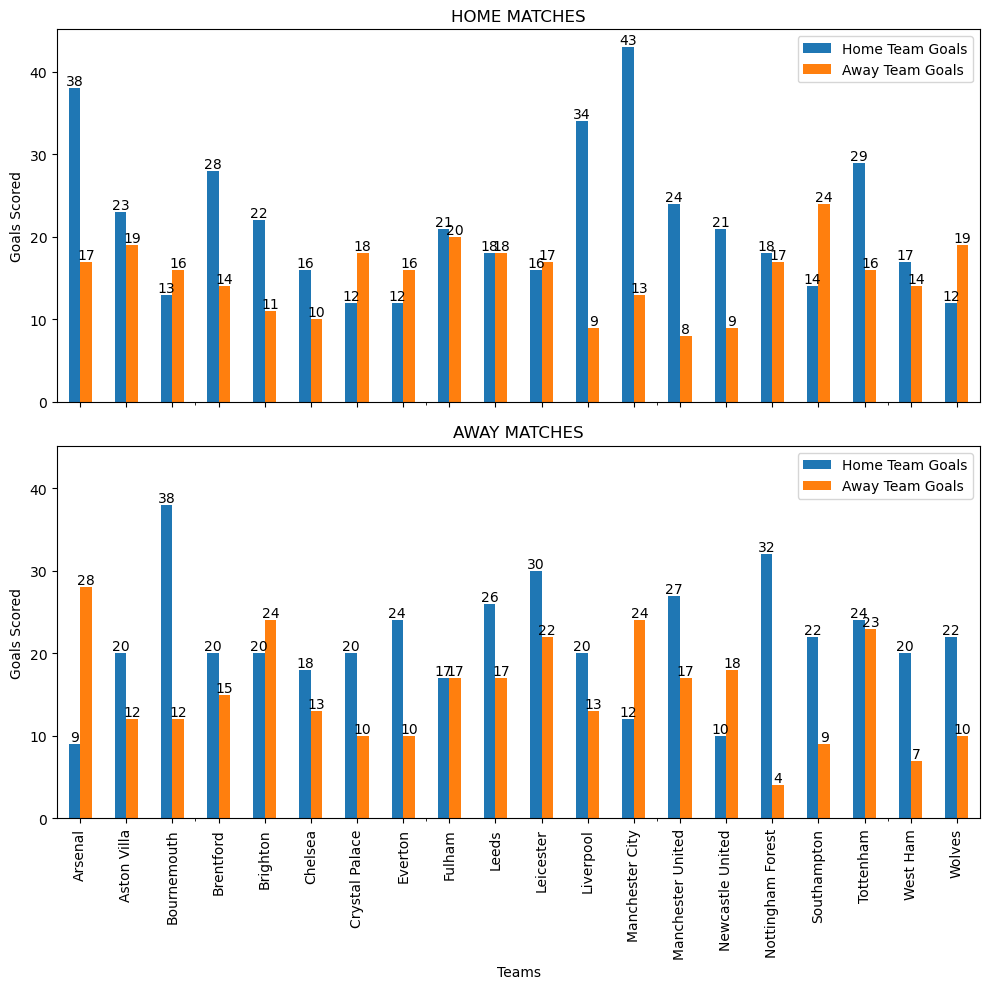

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10,10))

home_goals = team_stats[team_stats["event_team"] == "home"][["team","Home Team Goals","Away Team Goals"]]
away_goals = team_stats[team_stats["event_team"] == "away"][["team","Home Team Goals","Away Team Goals"]]


p1 = home_goals.set_index("team").plot.bar(ax=ax1)
ax1.set_title("HOME MATCHES")
ax1.set_ylabel("Goals Scored")

away_goals.set_index("team").plot.bar(ax=ax2)
ax2.set_title("AWAY MATCHES")
ax2.set_ylabel("Goals Scored")

for container in ax1.containers:
    ax1.bar_label(container)

for container in ax2.containers:
    ax2.bar_label(container)
    
plt.xlabel('Teams')

plt.tight_layout()

In [13]:
fig.savefig("epl_goals.png")